In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression

In [65]:
#read the bikes.csv data
df = pd.read_csv('bikes.csv')
price_df = pd.read_csv('DOX.csv')
price_df.info()
price_df2 = pd.read_csv('DOX.csv', parse_dates=['Date'])
price_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    float64       
 2   High       253 non-null    float64       
 3   Low        253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Adj Close  253 non-null    float64 

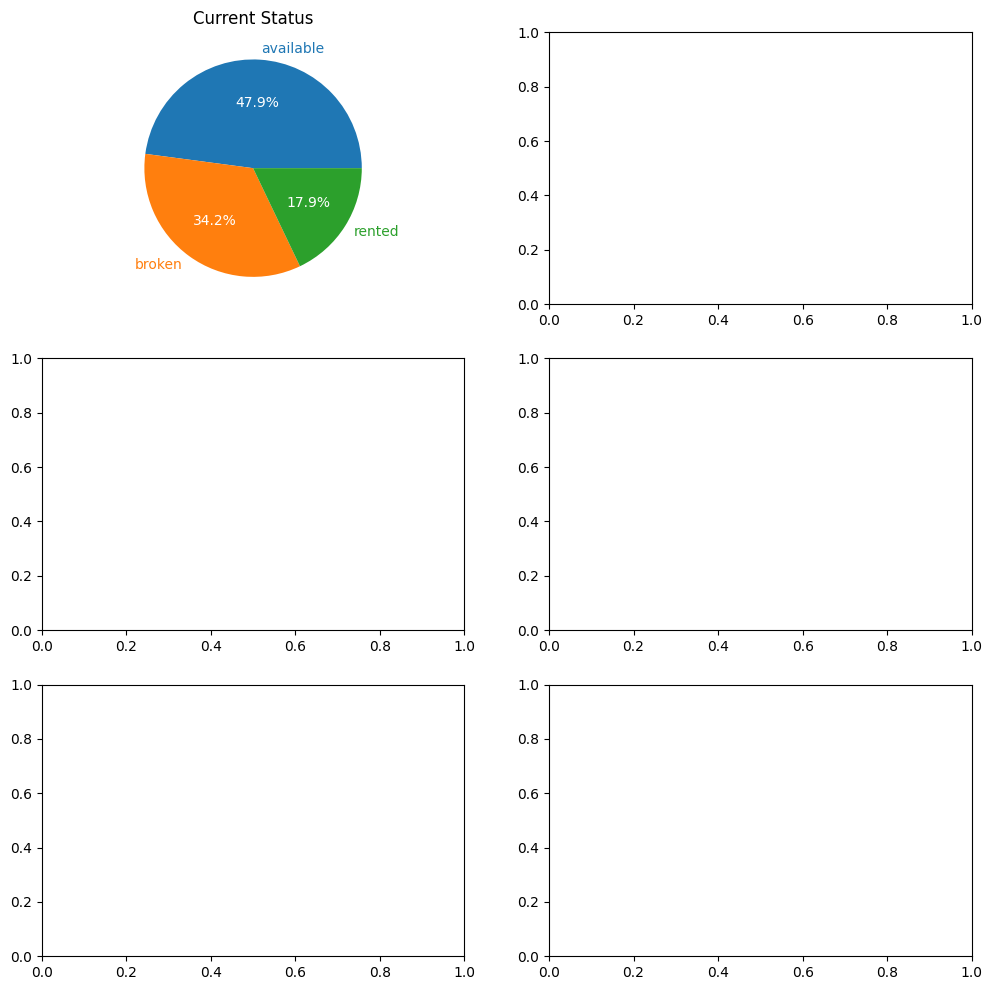

In [66]:
#divide a figure into subplots 0f 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

#make a pie chart of the statuses of the bikes
axs[0,0].set_title('Current Status')
vcounts = df['status'].value_counts()
patches, texts, pcts = axs[0,0].pie(vcounts, labels=vcounts.index, autopct='%1.1f%%', textprops=dict(color="w"))
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())


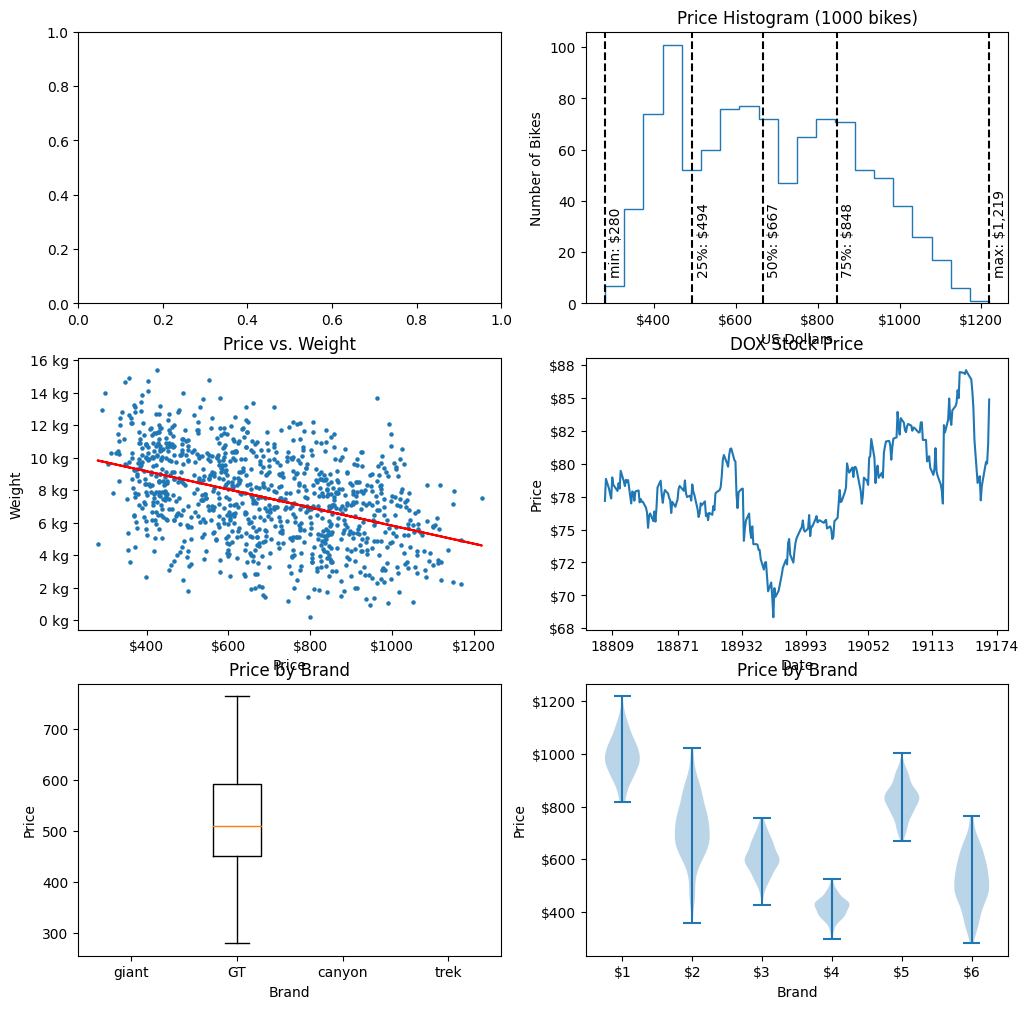

In [67]:
#create a histogram of the purchase price of the bikes
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs[0,1].set_title(f'Price Histogram ({len(df)} bikes)')
axs[0,1].set_xlabel('US Dollars')
axs[0,1].set_ylabel('Number of Bikes')
axs[0,1].hist(df['purchase_price'], histtype='step', bins=20, label=None)
axs[0,1].xaxis.set_major_formatter(lambda x, pos: f"${x:.0f}")

#add meaningful vertical lines
price_stats = df['purchase_price'].describe()
ignored_cols = ['std', 'mean','count']
for stat in price_stats.index:
    if stat in ignored_cols:
        continue
    value = price_stats[stat]
    label = f"{stat}: ${value:,.0f}"
    axs[0,1].axvline(value, color='k', linestyle='dashed', label=stat)
    axs[0,1].text(value + 10, 10, label, rotation=90, va='bottom')

#scatter plot of price vs weight
axs[1,0].set_title('Price vs. Weight')
axs[1,0].set_xlabel('Price')
axs[1,0].set_ylabel('Weight')
axs[1,0].xaxis.set_major_formatter(lambda x, pos: f"${x:.0f}")
axs[1,0].yaxis.set_major_formatter(lambda x, pos: f"{x:.0f} kg")
axs[1,0].scatter(df['purchase_price'], df['weight'], 5,label=None)
#add a linear regression line
reg = LinearRegression().fit(df['purchase_price'].values.reshape(-1,1), df['weight'])
axs[1,0].plot(df['purchase_price'], reg.predict(df['purchase_price'].values.reshape(-1,1)), color='red', linestyle='solid', label='Linear Regression')



#make a time-series plot of the price of the DOX stock price
axs[1,1].set_title('DOX Stock Price')
axs[1,1].set_xlabel('Date')
axs[1,1].set_ylabel('Price')
axs[1,1].xaxis.set_major_formatter(lambda x, pos: f"{x:.0f}")
axs[1,1].yaxis.set_major_formatter(lambda x, pos: f"${x:.0f}")
axs[1,1].plot(price_df2['Date'], price_df2['Close'], label=None)


#make a box plot showing the range of purchase prices for each brand of bike, display giant, GT, canyonal, and trek
axs[2,0].set_title('Price by Brand')    
axs[2,0].set_xlabel('Brand')    
axs[2,0].set_ylabel('Price')
axs[2,0].xaxis.set_major_formatter(lambda x, pos: f"${x:.0f}")
axs[2,0].boxplot([df[df['brand'] == 'giant']['purchase_price'], df[df['brand'] == 'GT']['purchase_price'], df[df['brand'] == 'canyon']['purchase_price'], df[df['brand'] == 'trek']['purchase_price']], labels=['giant', 'GT', 'canyon', 'trek'])


#make a violin plot showing the range of prices for each brand of bike
axs[2,1].set_title('Price by Brand')
axs[2,1].set_xlabel('Brand')
axs[2,1].set_ylabel('Price')
axs[2,1].xaxis.set_major_formatter(lambda x, pos: f"${x:.0f}")
axs[2,1].yaxis.set_major_formatter(lambda x, pos: f"${x:.0f}")
axs[2,1].violinplot([df[df['brand'] == brand]['purchase_price'] for brand in df['brand'].unique()])

#show the plots
plt.show()







